In [1]:
import tensorflow as tf
tf.__version__

2021-10-09 20:03:33.513928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-09 20:03:33.513945: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.6.0'

In [2]:
mnist = tf.keras.datasets.mnist # 0-9, 28x28 images, 1 colour channel

In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data() # trainX is an array, etc, arraying from 0-255

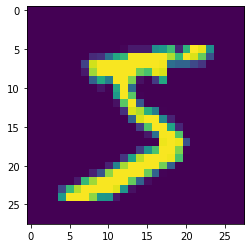

In [10]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])
plt.show()

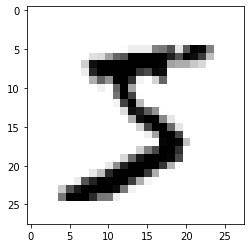

In [11]:
plt.imshow(trainX[0], cmap = plt.cm.binary) # convert to grayscale image
plt.show()

In [12]:
trainX = tf.keras.utils.normalize(trainX, axis=1) # values will be scaled between 0-1, easier for CNN to learn
testX = tf.keras.utils.normalize(testX, axis=1) # values will be scaled between 0-1, easier for CNN to learn

In [39]:
# build the model
model = tf.keras.models.Sequential() # most common model, feed forward model
model.add(tf.keras.layers.Flatten()) # flattens out the input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 units/neurons, activation function ReLU
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer, # neurons will be # of classifications, 10 (0-9)

model.compile(optimizer='adam', # 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(trainX, trainY, epochs=3) # epoch is the number of passes of the entire training dataset

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1084 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0735 - accuracy: 0.9768


In [18]:
"""
97.6% accuracy afteer 3 epochs.

NN are great at fitting, did they overfit? 

The hope is that our model generalized, learned patterns and attributes to what makes an 8 or a 4, 
instead of just memorizing.

"""

# calculate validation loss and accuracy
valLoss, valAcc = model.evaluate(testX, testY)
print(valLoss, valAcc)

313/313 [==============================] - 0s 833us/step - loss: 0.1016 - accuracy: 0.9696
0.10155905038118362 0.9696000218391418


In [20]:
# save the model
model.save('testModel.model')
newModel = tf.keras.models.load_model('testModel.model')

predictions = newModel.predict([testX])

2021-10-09 20:24:45.068647: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: testModel.model/assets


In [22]:
print(predictions) # prints one hot arrays, the probability distributions

[[1.2741926e-07 4.3684378e-07 8.2632148e-05 ... 9.9925917e-01
  1.6956891e-06 8.6560640e-06]
 [2.9335894e-07 1.6409793e-05 9.9996769e-01 ... 1.1022260e-08
  1.1138515e-05 2.7292012e-12]
 [3.9516770e-08 9.9981171e-01 1.0886433e-05 ... 9.9273035e-05
  2.7384835e-05 5.8019378e-07]
 ...
 [1.0129554e-09 1.4624534e-08 3.2730004e-08 ... 8.2366205e-06
  3.6226770e-06 7.2175654e-04]
 [1.9677553e-05 1.8442339e-06 6.1223327e-05 ... 5.8940286e-06
  3.4452186e-03 2.1867697e-08]
 [2.2068998e-05 9.1164098e-09 2.2006343e-07 ... 1.5447435e-11
  2.5709920e-07 1.9462711e-09]]


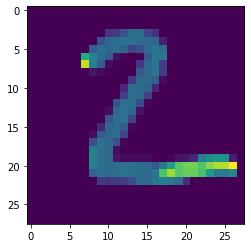

In [40]:
plt.imshow(testX[1])
plt.show()

In [41]:
import numpy as np
print(np.argmax(predictions[1]))

2
